# Alexander Tyan - Lab notebook

In [535]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [536]:
data = pd.read_csv("gss2012.csv")

### Explore some basic demographics:

#### Age:

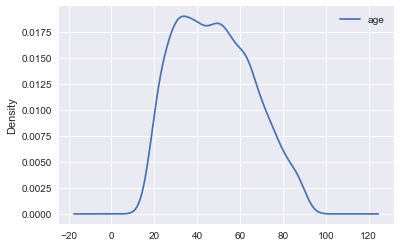

In [537]:
age_df = data[["age"]]
age_df.plot.density()

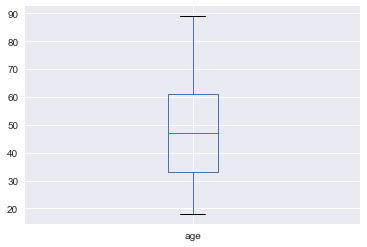

In [538]:
age_df.plot.box()

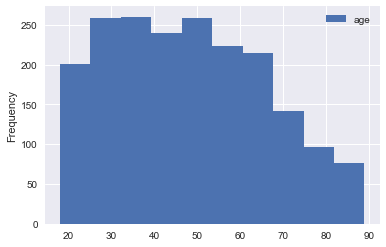

In [539]:
age_df.plot.hist()

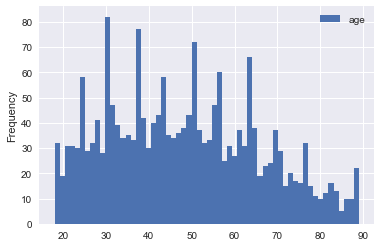

In [540]:
age_df.plot.hist(bins=60)

Distribution quite as expected. But why the heaping? Do people round their age in survey responses?

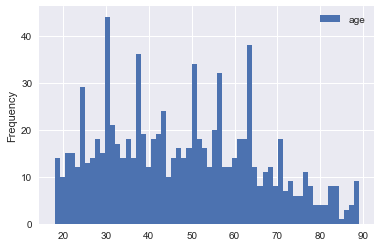

In [541]:
age_gender_df = data[["age", "sex"]]
age_male_df = age_gender_df[age_gender_df.sex == "Male"]
age_male_df.plot.hist(bins=60)

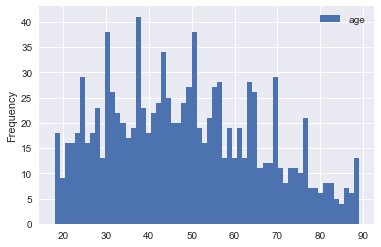

In [542]:
age_female_df = age_gender_df[age_gender_df.sex == "Female"]
age_female_df.plot.hist(bins=60)

=> Heaping happens in both genders. Strange. Where is it from? A sampling process artifact?

/Users/alexander/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


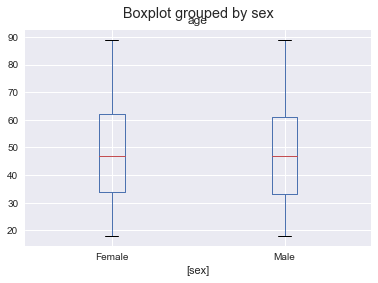

In [543]:
age_gender_df.boxplot(by='sex') # No seeming outliers

#### Work Status:

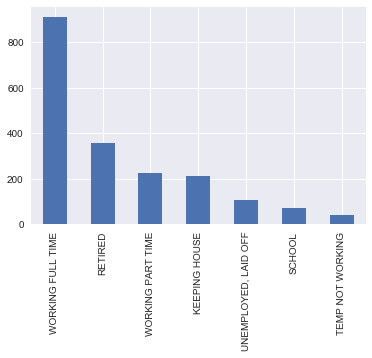

In [544]:
work_status_series = data.wrkstat.value_counts()
work_status_series.plot.bar()

#### Income:

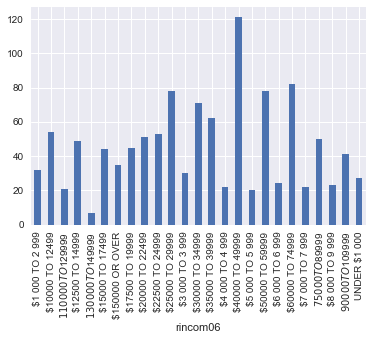

In [545]:
personal_income_series = data.groupby("rincom06").size()
personal_income_series.plot.bar()

Better order:

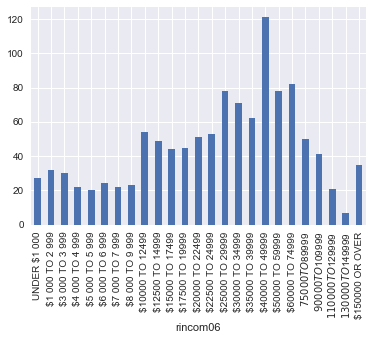

In [546]:
order_income = ['$1 000 TO 2 999', '$10000 TO 12499', '$110000 TO $129999',
       '$12500 TO 14999', '$130000 TO $149999', '$15000 TO 17499',
       '$150000 OR OVER', '$17500 TO 19999', '$20000 TO 22499',
       '$22500 TO 24999', '$25000 TO 29999', '$3 000 TO 3 999',
       '$30000 TO 34999', '$35000 TO 39999', '$4 000 TO 4 999',
       '$40000 TO 49999', '$5 000 TO 5 999', '$50000 TO 59999',
       '$6 000 TO 6 999', '$60000 TO 74999', '$7 000 TO 7 999',
       '$75000 TO $89999', '$8 000 TO 9 999', '$90000 TO $109999',
       'UNDER $1 000']
order_income.sort()
new_list = []
for i in range(len(order_income)):
    clean_string = order_income[i].split()[0].replace("$","")
    try:
        new_list.append((int(clean_string), order_income[i]))
    except ValueError:
        new_list.append((0, order_income[i]))
new_list.sort()
reordered_list = []
for item, string in new_list:
    reordered_list.append(string)
reordered_list
personal_income_series_sorted = personal_income_series.reindex(index=reordered_list)
personal_income_series_sorted.plot.bar()

#### Religious Practice:

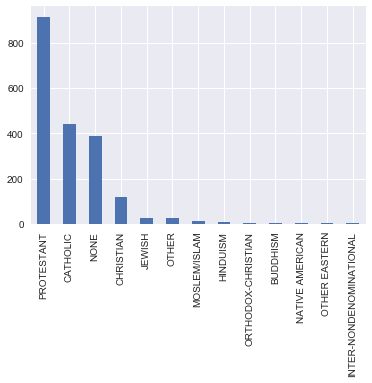

In [547]:
religion_series = data.relig.value_counts()
religion_series.plot.bar()

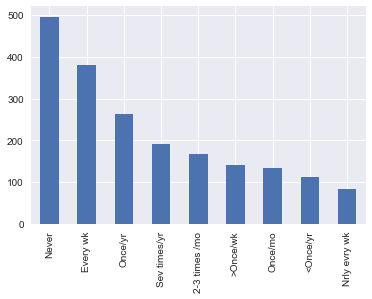

In [548]:
religion_attend_series = data.attend.value_counts()
religion_attend_series.plot.bar()

Make better order for comparisons:

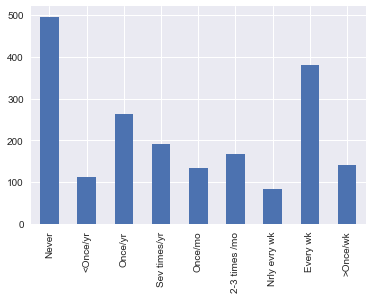

In [549]:
religion_attend_series = data.attend.value_counts()
religion_attend_series_sort = religion_attend_series.reindex(index=['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk'])
religion_attend_series_sort.plot.bar()

#### Education:

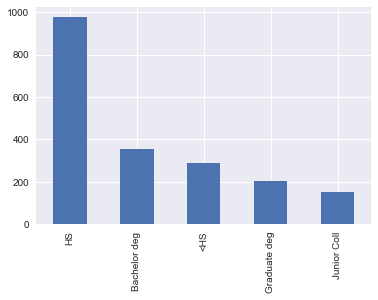

In [550]:
educ_level_series = data.degree.value_counts()
educ_level_series.plot.bar()

Make better order for comparisons:

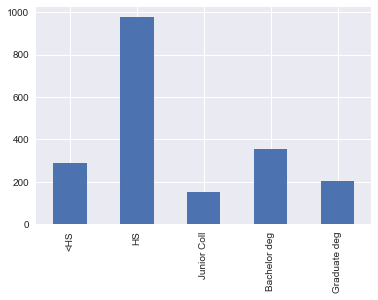

In [551]:
educ_level_series = data.degree.value_counts()
educ_level_series_sort = educ_level_series.reindex(index=['<HS', 'HS', 'Junior Coll', 'Bachelor deg', 'Graduate deg'])
educ_level_series_sort.plot.bar()

### Explore some more:

#### Gun issues:

Maybe gun law support varries by degree?:

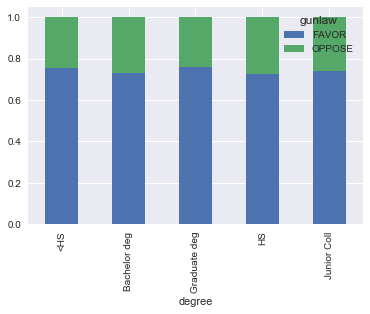

In [552]:
guns_n_education_df = data[["degree", "gunlaw"]]
gunlaw_series = data.groupby(["degree", "gunlaw"]).size()
gunlaw_series_to_percent = gunlaw_series / gunlaw_series.groupby('degree').sum()
gunlaw_series_to_percent.unstack().plot(kind='bar', stacked=True)

Maybe gun law support varies by religious attendence?:

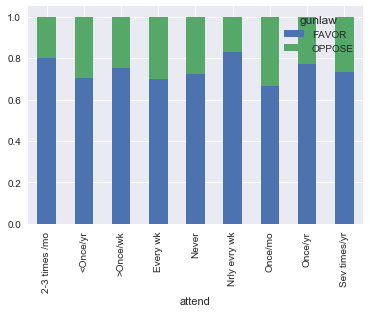

In [553]:
guns_n_rel_attend_df = data[["attend", "gunlaw"]]
relig_attend_series = data.groupby(["attend", "gunlaw"]).size()
relig_attend_to_percent = relig_attend_series / relig_attend_series.groupby('attend').sum()
relig_attend_to_percent.unstack().plot(kind='bar', stacked=True)

Make better order for comparisons:

In [554]:
# Some code that ends up being useless:
l1 = ['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk']
l2 = ["FAVOR", "OPPOSE"]
tuples_list = []
for attend in l1:
    for gun_opinion in l2:
        tuples_list.append((attend, gun_opinion))
tuples_list

[('Never', 'FAVOR'),
 ('Never', 'OPPOSE'),
 ('<Once/yr', 'FAVOR'),
 ('<Once/yr', 'OPPOSE'),
 ('Once/yr', 'FAVOR'),
 ('Once/yr', 'OPPOSE'),
 ('Sev times/yr', 'FAVOR'),
 ('Sev times/yr', 'OPPOSE'),
 ('Once/mo', 'FAVOR'),
 ('Once/mo', 'OPPOSE'),
 ('2-3 times /mo', 'FAVOR'),
 ('2-3 times /mo', 'OPPOSE'),
 ('Nrly evry wk', 'FAVOR'),
 ('Nrly evry wk', 'OPPOSE'),
 ('Every wk', 'FAVOR'),
 ('Every wk', 'OPPOSE'),
 ('>Once/wk', 'FAVOR'),
 ('>Once/wk', 'OPPOSE')]

In [555]:
# Check order of attend, seems not good:
relig_attend_sorted_to_percent.unstack()

gunlaw,FAVOR,OPPOSE
attend,,
2-3 times /mo,0.800000,0.200000
<Once/yr,0.702703,0.297297
>Once/wk,0.752809,0.247191
Every wk,0.701245,0.298755
Never,0.724359,0.275641
Nrly evry wk,0.827586,0.172414
Once/mo,0.666667,0.333333
Once/yr,0.771429,0.228571
Sev times/yr,0.732824,0.267176


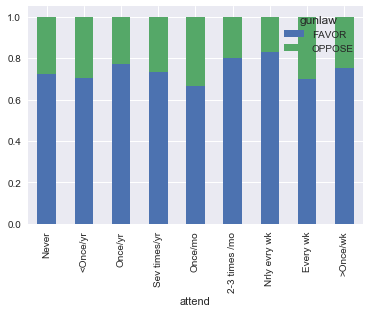

In [556]:
# Fix order of attend:
relig_attend_series_sorted = relig_attend_series.reindex(tuples_list)
relig_attend_sorted_to_percent = relig_attend_series_sorted / relig_attend_series_sorted.groupby('attend').sum()
sort_again = relig_attend_sorted_to_percent.unstack().reindex(index=['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk'])
# Finally graph:
sort_again.plot(kind='bar', stacked=True)

Or by income?

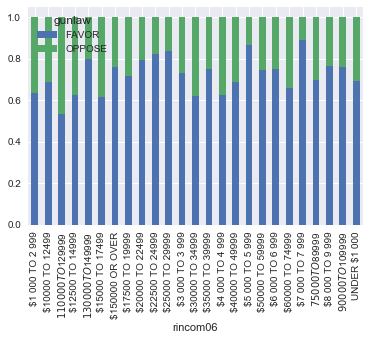

In [557]:
guns_n_income_df = data[["rincom06", "gunlaw"]]
income_guns_series = data.groupby(["rincom06", "gunlaw"]).size()
income_guns_series = income_guns_series / income_guns_series.groupby('rincom06').sum()
income_guns_series.unstack().plot(kind='bar', stacked=True)

Try better ordering:

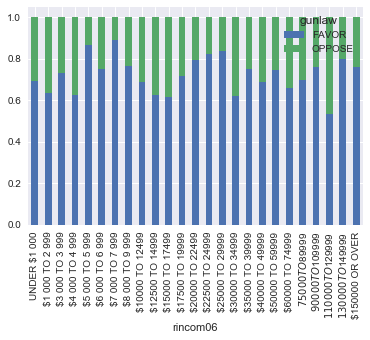

In [558]:
order_income = ['$1 000 TO 2 999', '$10000 TO 12499', '$110000 TO $129999',
       '$12500 TO 14999', '$130000 TO $149999', '$15000 TO 17499',
       '$150000 OR OVER', '$17500 TO 19999', '$20000 TO 22499',
       '$22500 TO 24999', '$25000 TO 29999', '$3 000 TO 3 999',
       '$30000 TO 34999', '$35000 TO 39999', '$4 000 TO 4 999',
       '$40000 TO 49999', '$5 000 TO 5 999', '$50000 TO 59999',
       '$6 000 TO 6 999', '$60000 TO 74999', '$7 000 TO 7 999',
       '$75000 TO $89999', '$8 000 TO 9 999', '$90000 TO $109999',
       'UNDER $1 000']
order_income.sort()
new_list = []
for i in range(len(order_income)):
    clean_string = order_income[i].split()[0].replace("$","")
    try:
        new_list.append((int(clean_string), order_income[i]))
    except ValueError:
        new_list.append((0, order_income[i]))
new_list.sort()
reordered_list = []
for item, string in new_list:
    reordered_list.append(string)
reordered_list

# Fix order:
income_guns_series.unstack().reindex(index=reordered_list).plot(kind='bar', stacked=True)

=> Doesn't seem like there's a trend, but also the number of cases in each category is pretty small, so the errors may be large anyhow. Would have to check the number of cases in each category in similar previous EDA graphs.

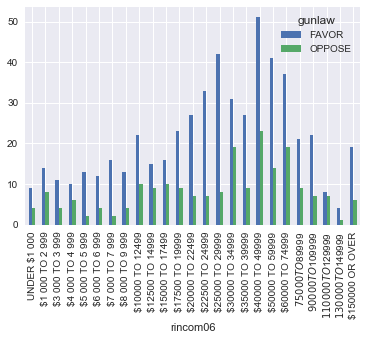

In [559]:
# Let's check group sizes:
data.groupby(["rincom06", "gunlaw"]).size().unstack().reindex(index=reordered_list).plot.bar()

Seems like case scarcity, because sample is too small to break into that many groups. Also, seems like categories do not have equal absolute ranges, so the data seems artificially skewed to the left. 

#### Premarital Sex Attitudes:

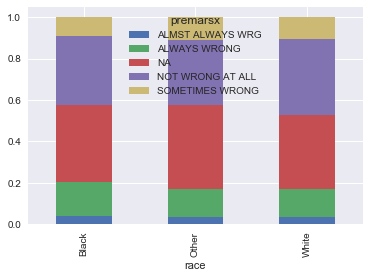

In [560]:
df_premarsx_race = data[["race", "premarsx"]].fillna("NA") # To see if there's some systematic missingness.
#marital_dict = {"NOT WRONG AT ALL": 4, "ALWAYS WRONG": 1, "SOMETIMES WRONG": 3, "ALMST ALWAYS WRG": 2}

df_premarsx_race_series = df_premarsx_race.groupby(("race", "premarsx")).size()#.plot.bar()
df_premarsx_race_series = df_premarsx_race_series / df_premarsx_race_series.groupby("race").sum()
df_premarsx_race_series.unstack().plot(kind='bar', stacked=True)

=> 
1. Doesn't seem like any particular systematic pattern in missing data.
2. Doesn't seem like attitides are that different according to race.

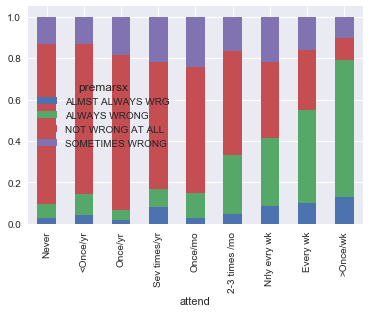

In [561]:
df_premarsx_religattend = data[["attend", "premarsx"]]#.fillna("NA") # To see if there's some systematic missingness.
df_premarsx_religattend_series = df_premarsx_religattend.groupby(("attend", "premarsx")).size()#.plot.bar()
df_premarsx_religattend_series = df_premarsx_religattend_series / df_premarsx_religattend_series.groupby("attend").sum()
#df_premarsx_religattend_series.unstack()#.plot(kind='bar', stacked=True)
df_premarsx_religattend_series_sorted = df_premarsx_religattend_series.unstack().reindex(index=['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk'])
df_premarsx_religattend_series_sorted.plot(kind='bar', stacked=True)

=> As expected, seems more religious attendance is associated with a more negative attitude toward premarital sex.
What is unexpected is this trend is only visible in the extreme categories of "always wrong/not wrong at all," while in-between categories of "almost.../sometimes..." don't seem to be affected as strongly and clearly. Not sure why that's the case. It's like a kind of a polarizing effect of religious attendance on pre-marital sex atttitudes.

#### TV Hours:

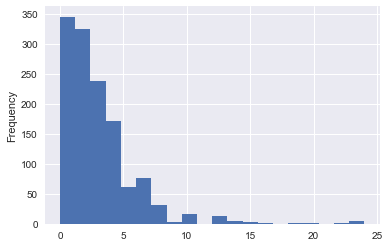

In [562]:
data["tvhours"].plot.hist(bins=20)

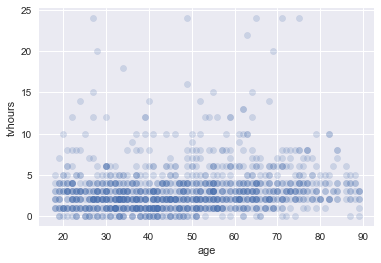

In [563]:
data[["age", "tvhours"]].plot.scatter(x="age", y="tvhours", alpha=.2, s=40) 

=> Unclear relationship (?)

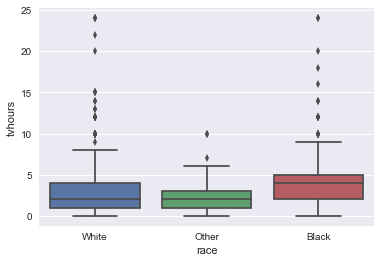

In [564]:
sns.boxplot(x="race", y="tvhours", data=data) 

=> Seems like higher medians for black race, but outliers make it hard to see. Let's zoom in:

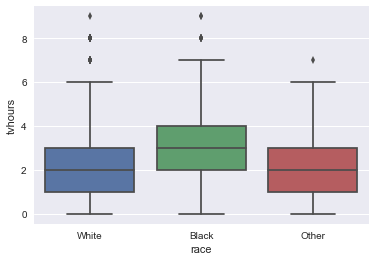

In [565]:
sns.boxplot(x="race", y="tvhours", data=data[data["tvhours"] < 10]) 

=> Indeed, seems higher for blacks. Check CIs:

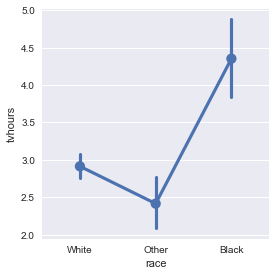

In [566]:
sns.factorplot(x="race", y="tvhours", data=data, ci=95)

=> Looks promising for further investigation

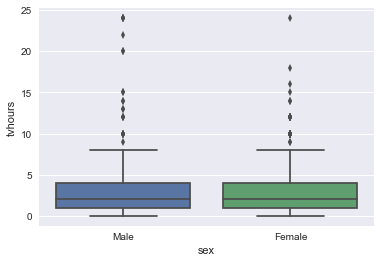

In [567]:
sns.boxplot(x="sex", y="tvhours", data=data)

=> Genders don't seem that different. Check by zooming in:

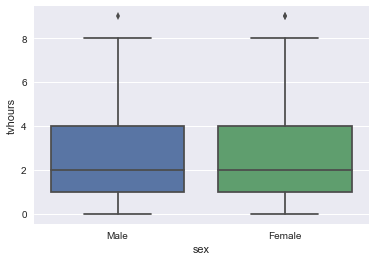

In [568]:
sns.boxplot(x="sex", y="tvhours", data=data[data["tvhours"] < 10])

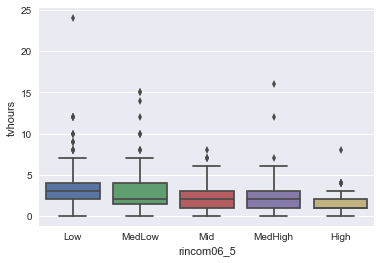

In [569]:
data = pd.read_csv("gss2012.csv")
data["rincom06_5"] = data.rincom06_5.astype("category", categories=['Low', 'MedLow', 'Mid', 'MedHigh', 'High'], ordered=True)
sns.boxplot(x="rincom06_5", y="tvhours", data=data) 

Zoom in:

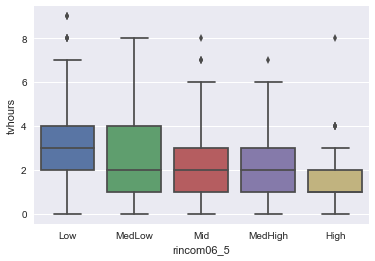

In [570]:
sns.boxplot(x="rincom06_5", y="tvhours", data=data[data["tvhours"] < 10]) 

=> Seems like more tvhours for low income than for everyone else. Check CIs:

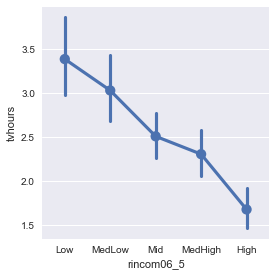

In [571]:
sns.factorplot(x="rincom06_5", y="tvhours", data=data, ci=95) 

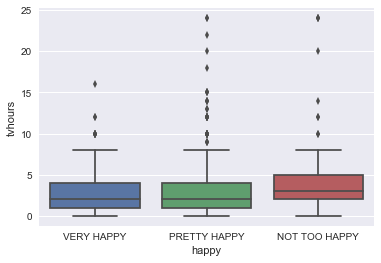

In [572]:
sns.boxplot(x="happy", y="tvhours", data=data) 

=> It seems like maybe some slight positive correlation between tvhours and "unhappiness". Zoom in:

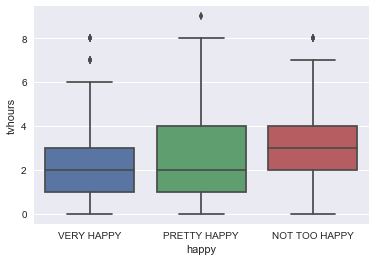

In [573]:
sns.boxplot(x="happy", y="tvhours", data=data[data["tvhours"] < 10]) 

=> Check CIs:

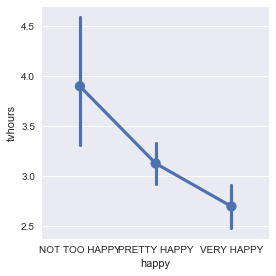

In [574]:
data = pd.read_csv("gss2012.csv")
data["happy"] = data.happy.astype("category", categories=['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY'], ordered=True)
sns.factorplot(x="happy", y="tvhours", data=data, ci=95) 

#### Age and Happiness:

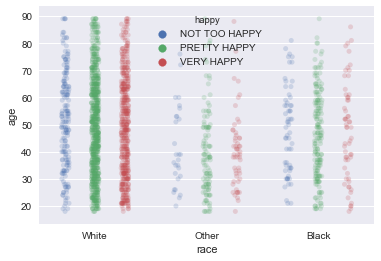

In [575]:
sns.stripplot(x="race", y="age", data=data, jitter=True, alpha=.2, hue="happy", dodge=True)

=> Not sure this is useful... Let's try this instead:

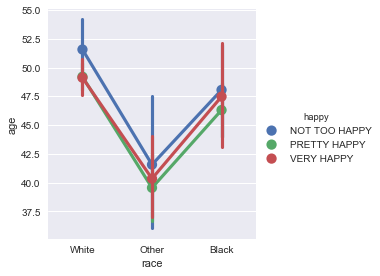

In [581]:
sns.factorplot(x="race", y="age", data=data, hue="happy")